In [36]:
import pandas as pd
# Load the data
train = pd.read_csv('/Users/ad53533/Desktop/Applied ML/Project/train.csv')
test = pd.read_csv('/Users/ad53533/Desktop/Applied ML/Project/test.csv')

In [37]:
train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
import pandas as pd

# Load your dataset into a DataFrame named `train` (replace 'path/to/train.csv' with your file path)
# train = pd.read_csv('path/to/train.csv')

# Remove rows where the 'sii' column has missing values
train = train.dropna(subset=['sii'])

print("Rows with missing 'sii' values have been removed.")
# Remove the 'id' column from the train dataset
train = train.drop(columns=train.columns[0], errors='ignore')


Rows with missing 'sii' values have been removed.


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

# Assuming `train` is the complete dataset without the 'id' column and has 'sii' as the target
# Split the data into 80% training and 20% testing, separating features and target
X = train.drop(columns=['sii'])
y = train['sii']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical features into dummy variables for both sets
X_train_dummies = pd.get_dummies(X_train, drop_first=True)
X_test_dummies = pd.get_dummies(X_test, drop_first=True)

# # Align the columns in X_train and X_test (ensure they have the same columns)
# X_train_dummies, X_test_dummies = X_train_dummies.align(X_test_dummies, join='outer', axis=1, fill_value=np.nan)

# Apply KNN imputation to the training set
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_dummies), columns=X_train_dummies.columns)

# Apply KNN imputation to the testing set
X_test_imputed = pd.DataFrame(imputer.transform(X_test_dummies), columns=X_test_dummies.columns)

# Check if any NaN values remain in the imputed datasets
print("Any NaN values left in X_train_imputed?", X_train_imputed.isnull().values.any())
print("Any NaN values left in X_test_imputed?", X_test_imputed.isnull().values.any())

print("KNN imputation with dummy variables completed successfully for both training and testing datasets.")


Any NaN values left in X_train_imputed? False
Any NaN values left in X_test_imputed? False
KNN imputation with dummy variables completed successfully for both training and testing datasets.


In [40]:
X_train_imputed.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PAQ_C-Season_Winter,PCIAT-Season_Spring,PCIAT-Season_Summer,PCIAT-Season_Winter,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
0,5.0,0.0,60.0,17.274885,49.00,59.0,27.2,129.0,94.0,162.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,1.0,60.0,17.873855,50.25,64.2,25.4,75.0,77.0,116.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,9.0,1.0,90.0,13.927006,48.50,46.6,22.0,59.0,82.0,101.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,11.0,1.0,66.8,8.708568,55.75,0.0,21.2,85.8,86.8,134.6,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,14.0,0.0,75.0,18.363773,61.00,97.2,26.0,95.0,75.0,150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


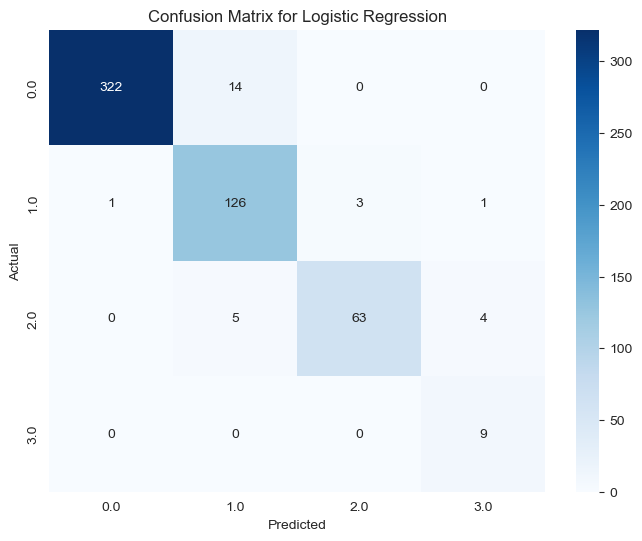

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       336
         1.0       0.87      0.96      0.91       131
         2.0       0.95      0.88      0.91        72
         3.0       0.64      1.00      0.78         9

    accuracy                           0.95       548
   macro avg       0.87      0.95      0.90       548
weighted avg       0.95      0.95      0.95       548



In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Scale the training data and transform the test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test_imputed)        # Transform the test data

# Step 2: Train the logistic regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='saga')
model.fit(X_train_scaled, y_train)

# Step 3: Predict on the test set
y_pred = model.predict(X_test_scaled)

# Step 4: Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Display the classification report
print("Classification Report:\n", classification_rep)


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, cohen_kappa_score
from imblearn.over_sampling import SMOTE
from mord import LogisticIT  # Ordinal Logistic Regression (LogisticIT model)

# 1. Impute missing values in the training data
knn_imputer = KNNImputer(n_neighbors=3)
X_train_imputed = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)

# 2. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

# 3. Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# 4. Define the Ordinal Logistic Regression model
model = LogisticIT()

# 5. Set up StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 6. Define a parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [1, 10, 100, 1000]  # Regularization parameter for LogisticIT
}

# Convert labels to integer type
y_train_balanced = y_train_balanced.astype(int)
y_test = y_test.astype(int)

# 7. Grid search with StratifiedKFold
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', error_score='raise')
grid_search.fit(X_train_balanced, y_train_balanced)

# 8. Best parameters and model fitting
print("Best parameters found: ", grid_search.best_params_)
model = grid_search.best_estimator_

# 9. Impute missing values and standardize the test data
X_test_imputed = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)
X_test_scaled = scaler.transform(X_test_imputed)

# 10. Predicting on the test set
y_pred = model.predict(X_test_scaled)

# 11. Model evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Accuracy: {accuracy}')
print(f'Quadratic Weighted Kappa: {kappa}')

# 12. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix - Ordinal Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


ValueError: could not convert string to float: 'Summer'